1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [1]:
from scipy import linalg as lin
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
np.random.seed(12345)

N = 1000
x1 = np.random.normal(loc = 0, scale = 1, size = N)
x2 = x1 + np.random.normal(loc = 0, scale = 3, size = N)
x3 = 2*x1 + x2

dataset = np.array([x1 ,x2, x3])

cov_matr = np.cov(dataset)
e_val, e_vec = lin.eig(cov_matr)
print("Covariance matrix:\n", cov_matr)
print("\nEigenvalues:\n", e_val)
print("\nEigenvectors:\n", e_vec)

#do the same using svd
U, spec, Vh = lin.svd(dataset)
e_val_svd = spec**2/(N-1)
print("\nSVD eigenvalues:\n", e_val_svd)
print("\nSVD eigenvectors:\n", U)

tot_var = sum(e_val_svd)
[print("\n% of tot variability expressed by principal component {}:".format(i+1),
          e_val_svd[i]/tot_var*100, "%") for i in range(len(e_val_svd)) ]

#find the number of components to cover the 99% of tot variability
cumul_var = np.cumsum(e_val_svd/tot_var*100)
#find the index for which the cumul_var is greater than 99 and add 1
n_comp = np.where(cumul_var > 99)[0][0] + 1  
print("\nWe can consider the first", n_comp, "components")

Covariance matrix:
 [[ 0.96031449  1.10655252  3.0271815 ]
 [ 1.10655252 10.65442781 12.86753285]
 [ 3.0271815  12.86753285 18.92189586]]

Eigenvalues:
 [ 2.86503484e+01+0.j -6.15430950e-16+0.j  1.88628973e+00+0.j]

Eigenvectors:
 [[-0.11130107 -0.81649658  0.56652044]
 [-0.58254193 -0.40824829 -0.70283585]
 [-0.80514407  0.40824829  0.43020502]]

SVD eigenvalues:
 [2.86537853e+01 1.88653521e+00 6.19093959e-32]

SVD eigenvectors:
 [[-0.11128163  0.56652426 -0.81649658]
 [-0.58256605 -0.70281586 -0.40824829]
 [-0.80512931  0.43023265  0.40824829]]

% of tot variability expressed by principal component 1: 93.82280479178685 %

% of tot variability expressed by principal component 2: 6.177195208213142 %

% of tot variability expressed by principal component 3: 2.027136418889687e-31 %

We can consider the first 2 components


Given how the dataset was constructed, do these make sense?
Yes, because the third component of the dataset is a linear combination of the first two.

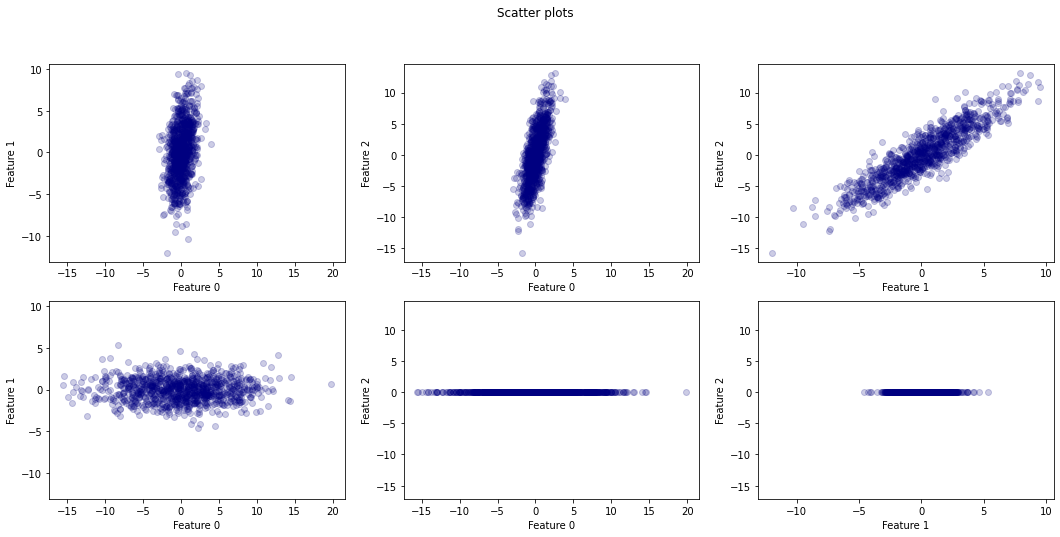

In [3]:
#Redefine the data in the basis yielded by the PCA procedure
dataset_rot = np.dot(U.T, dataset)

fig = plt.figure(figsize = (18,8))
pl01 = fig.add_subplot(2, 3, 1)
pl02 = fig.add_subplot(2, 3, 2)
pl12 = fig.add_subplot(2, 3, 3)
pl01_rot = fig.add_subplot(2, 3, 4, sharex = pl01, sharey = pl01)
pl02_rot = fig.add_subplot(2, 3, 5, sharex = pl02, sharey = pl02)
pl12_rot = fig.add_subplot(2, 3, 6, sharex = pl12, sharey = pl12)


pl01.scatter(dataset[0,:], dataset[1,:], color = "navy", alpha = 0.2)
pl01.set_xlabel("Feature 0")
pl01.set_ylabel("Feature 1")

pl02.scatter(dataset[0,:], dataset[2,:], color = "navy", alpha = 0.2)
pl02.set_xlabel("Feature 0")
pl02.set_ylabel("Feature 2")

pl12.scatter(dataset[1,:], dataset[2,:], color = "navy", alpha = 0.2)
pl12.set_xlabel("Feature 1")
pl12.set_ylabel("Feature 2")


pl01_rot.scatter(dataset_rot[0,:], dataset_rot[1,:], color = "navy", alpha = 0.2)
pl01_rot.set_xlabel("Feature 0")
pl01_rot.set_ylabel("Feature 1")

pl02_rot.scatter(dataset_rot[0,:], dataset_rot[2,:], color = "navy", alpha = 0.2)
pl02_rot.set_xlabel("Feature 0")
pl02_rot.set_ylabel("Feature 2")

pl12_rot.scatter(dataset_rot[1,:], dataset_rot[2,:], color = "navy", alpha = 0.2)
pl12_rot.set_xlabel("Feature 1")
pl12_rot.set_ylabel("Feature 2")

plt.suptitle("Scatter plots")
plt.show()


2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

Covariance matrix (with noise):
 [[ 0.96498313  1.10686343  3.01516944]
 [ 1.10686343 10.69953458 12.88887133]
 [ 3.01516944 12.88887133 18.98643374]]

Eigenvalues (with noise):
 [2.87254657e+01+0.j 2.23795949e-02+0.j 1.90310615e+00+0.j]

Eigenvectors (with noise):
 [[-0.11068576 -0.82069102  0.56054876]
 [-0.58254723 -0.4033921  -0.70562989]
 [-0.80522506  0.40464931  0.43344152]]

SVD eigenvalues (with noise):
 [2.86537853e+01 1.88653521e+00 6.19093959e-32]

SVD eigenvectors (with noise):
 [[-0.11128163  0.56652426 -0.81649658]
 [-0.58256605 -0.70281586 -0.40824829]
 [-0.80512931  0.43023265  0.40824829]]

% of tot variability expressed by principal component 1: 93.71767338007187 %

% of tot variability expressed by principal component 2: 6.209319220949121 %

% of tot variability expressed by principal component 3: 0.07300739897900599 %

We can consider the first 2 components


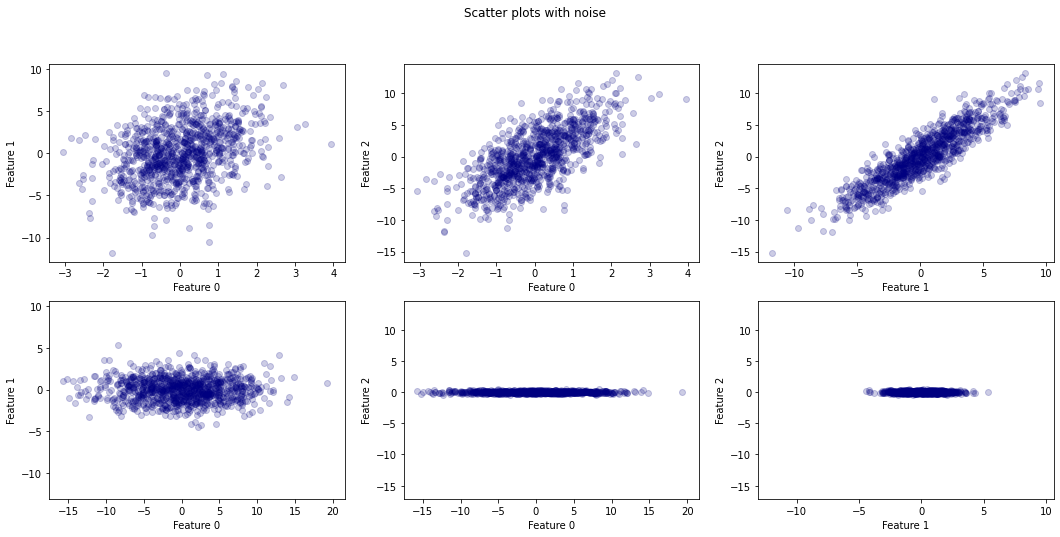

In [4]:
np.random.seed(12345)

std_x1 = x1.std()
x1_noise = x1 + np.sum(np.random.normal(loc = 0, scale = std_x1/50, size = (N,10)), axis = 1)

std_x2 = x2.std()
x2_noise = x2 + np.sum(np.random.normal(loc = 0, scale = std_x2/50, size = (N,10)), axis = 1)

std_x3 = x3.std()
x3_noise = x3 + np.sum(np.random.normal(loc = 0, scale = std_x3/50, size = (N,10)), axis = 1)

dataset_noise = np.array([x1_noise, x2_noise, x3_noise])

cov_matr_noise = np.cov(dataset_noise)
e_val_noise, e_vec_noise = lin.eig(cov_matr_noise)
print("Covariance matrix (with noise):\n", cov_matr_noise)
print("\nEigenvalues (with noise):\n", e_val_noise)
print("\nEigenvectors (with noise):\n", e_vec_noise)

#do the same using svd
U_noise, spec_noise, Vh_noise = lin.svd(dataset_noise)
e_val_svd_noise = spec_noise**2/(N-1)
print("\nSVD eigenvalues (with noise):\n", e_val_svd)
print("\nSVD eigenvectors (with noise):\n", U)

tot_var_noise = sum(e_val_svd_noise)
[print("\n% of tot variability expressed by principal component {}:".format(i+1),
          e_val_svd_noise[i]/tot_var_noise*100, "%") for i in range(len(e_val_svd_noise)) ]

#find the number of components to cover the 99% of tot variability
cumul_var_noise = np.cumsum(e_val_svd_noise/tot_var_noise*100)
#find the index for which the cumul_var is greater than 99 and add 1
n_comp_noise = np.where(cumul_var_noise > 99)[0][0] + 1  
print("\nWe can consider the first", n_comp_noise, "components")

dataset_rot_noise = np.dot(U_noise.T, dataset_noise)

fig_n = plt.figure(figsize = (18,8))
pl01_n = fig_n.add_subplot(2, 3, 1)
pl02_n = fig_n.add_subplot(2, 3, 2)
pl12_n = fig_n.add_subplot(2, 3, 3)
pl01_n_rot = fig_n.add_subplot(2, 3, 4, sharex = pl01, sharey = pl01)
pl02_n_rot = fig_n.add_subplot(2, 3, 5, sharex = pl02, sharey = pl02)
pl12_n_rot = fig_n.add_subplot(2, 3, 6, sharex = pl12, sharey = pl12)


pl01_n.scatter(dataset_noise[0,:], dataset_noise[1,:], color = "navy", alpha = 0.2)
pl01_n.set_xlabel("Feature 0")
pl01_n.set_ylabel("Feature 1")

pl02_n.scatter(dataset_noise[0,:], dataset_noise[2,:], color = "navy", alpha = 0.2)
pl02_n.set_xlabel("Feature 0")
pl02_n.set_ylabel("Feature 2")

pl12_n.scatter(dataset_noise[1,:], dataset_noise[2,:], color = "navy", alpha = 0.2)
pl12_n.set_xlabel("Feature 1")
pl12_n.set_ylabel("Feature 2")


pl01_n_rot.scatter(dataset_rot_noise[0,:], dataset_rot_noise[1,:], color = "navy", alpha = 0.2)
pl01_n_rot.set_xlabel("Feature 0")
pl01_n_rot.set_ylabel("Feature 1")

pl02_n_rot.scatter(dataset_rot_noise[0,:], dataset_rot_noise[2,:], color = "navy", alpha = 0.2)
pl02_n_rot.set_xlabel("Feature 0")
pl02_n_rot.set_ylabel("Feature 2")

pl12_n_rot.scatter(dataset_rot_noise[1,:], dataset_rot_noise[2,:], color = "navy", alpha = 0.2)
pl12_n_rot.set_xlabel("Feature 1")
pl12_n_rot.set_ylabel("Feature 2")

plt.suptitle("Scatter plots with noise")
plt.show()




3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [5]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

--2020-12-02 19:54:28--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Risoluzione di archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connessione a archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: 1477391 (1,4M) [application/x-httpd-php]
Salvataggio in: "/Users/lorenzomancini/data/magic04.data"

magic04.data        100%[===================>]   1,41M   989KB/s    in 1,5s    

2020-12-02 19:54:30 (989 KB/s) - "/Users/lorenzomancini/data/magic04.data" salvato [1477391/1477391]

--2020-12-02 19:54:31--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Risoluzione di archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connessione a archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: 5400 (5,3K) [application/x-httpd-php]
Salvataggio 